In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [2]:
X, y = make_classification(n_samples=100
                          ,n_features=2
                          ,n_redundant=0
                          ,n_informative=2
                          ,random_state=1
                          ,n_clusters_per_class=1)


In [4]:
X.shape

(100, 2)

In [6]:
y.shape

(100,)

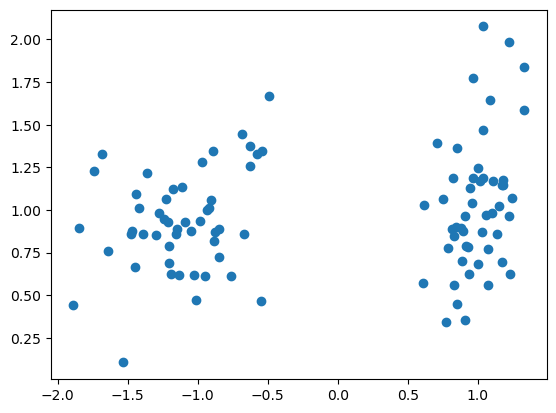

In [9]:
plt.scatter(X[:,0], X[:,1])

In [10]:
rng = np.random.RandomState(2) # 随机模式

X += 2 * rng.uniform(size=X.shape) # 加减0-1之间的随机数
linearly_separable = (X,y)

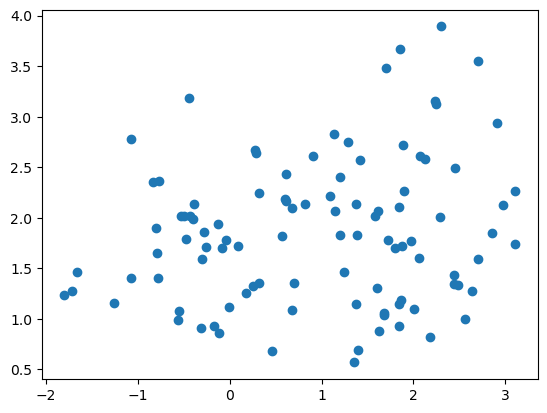

In [11]:
plt.scatter(X[:,0], X[:,1])

In [12]:
datasets = [make_moons(noise=0.3, random_state=0),
           make_circles(noise=0.3, factor=0.5, random_state=1),
           linearly_separable]

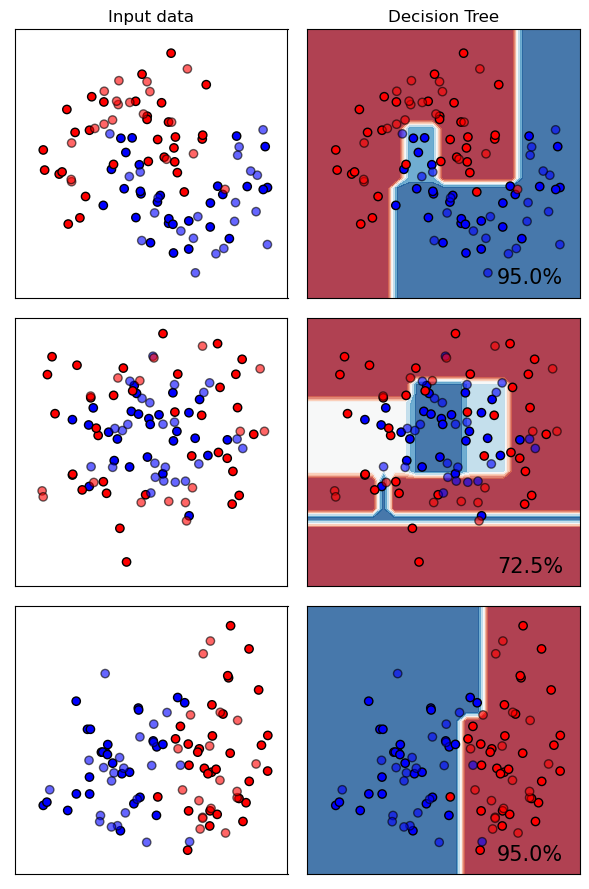

In [19]:
figure = plt.figure(figsize=(6,9))
i = 1

for ds_index, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4
                                                       ,random_state=42)
    
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    
    array1, array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
                                np.arange(x2_min, x2_max, 0.2))
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    ax = plt.subplot(len(datasets), 2, i)
    
    if ds_index == 0:
        ax.set_title("Input data")
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
               cmap=cm_bright,edgecolors='k')
    #放测试集
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
               cmap=cm_bright, alpha=0.6,edgecolors='k')
    
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    
    ax = plt.subplot(len(datasets),2,i)

    clf = DecisionTreeClassifier(max_depth=5)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    Z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:, 1]

    Z = Z.reshape(array1.shape)
    
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')

    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)
    
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    
    ax.set_xticks(())
    ax.set_yticks(())

    if ds_index == 0:
        ax.set_title("Decision Tree")

    ax.text(array1.max() - .3, array2.min() + .3, ('{:.1f}%'.format(score*100)),
            size=15, horizontalalignment='right')
    
    i += 1
    
plt.tight_layout()
plt.show()